In [2]:
from __future__ import print_function

In [3]:
import numpy as np
import pandas as pd

from IPython.display import Image

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
digits = datasets.load_digits()
print(digits.data.shape) 

(1797, 64)


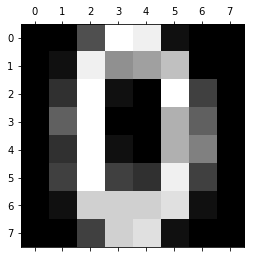

In [5]:
plt.gray()    
plt.matshow(digits.images[166]) 
plt.show();

In [7]:
Image(filename='digits.png') 

FileNotFoundError: [Errno 2] No such file or directory: 'digits.png'

In [8]:
X_centered = digits.data - digits.data.mean()
y = digits.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.5,random_state=42)

In [11]:
pd.Series(y_train).value_counts()

0    96
2    94
1    93
7    92
8    91
3    90
9    88
4    88
6    83
5    83
dtype: int64

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pcafeatures_train = pca.transform(X_train)

In [12]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

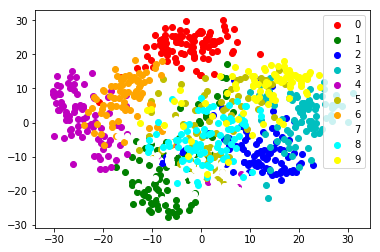

In [13]:
plot_PCA_2D(pcafeatures_train, target=y_train, target_names=digits.target_names)

In [14]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_pred = model_svm.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

0.97664071190211343

In [17]:
confusion_matrix(y_test,y_pred)

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 88,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 83,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 88,  0,  0,  0,  1,  4,  0],
       [ 0,  1,  0,  0, 92,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 96,  0,  1,  0,  2],
       [ 2,  0,  0,  0,  0,  0, 96,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 86,  0,  1],
       [ 0,  2,  0,  0,  2,  1,  0,  1, 77,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 90]])

In [18]:
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.001)
model_svm2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
y_pred2 = model_svm2.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred2)

0.98665183537263623

In [21]:
confusion_matrix(y_test,y_pred2)

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 89,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 83,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 90,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 97,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  0,  1, 96,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 86,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 83,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 88]])